# Multilingual BERT Approach

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_datasets as tfds

import sklearn
from sklearn.model_selection import train_test_split

import transformers

from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import backend as K

import logging
tf.get_logger().setLevel(logging.ERROR)


In [8]:
#Check for GPU presence
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Read in the Data

In [2]:
amharic_data = pd.read_csv('data/amharic/amharic.csv')
amharic_data

,id,tweet,subtask_a
0,0,አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለ...,NOT
1,1,እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደረ...,NOT
2,2,የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የ...,NOT
3,3,ከአማራ ህዝብ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመል...,NOT
4,4,ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ...,OFF
...,...,...,...
29995,29995,በአሉ የሁሉም ኢትዮጵያዊ ስላልሆነ በኦሮምኛው ቢለፋደድ ምን አገባን,OFF
29996,29996,ተባረክ አብቹ ፈር ቀዳጅ ስለሆንህ መጋረጃው መቀደድ ስለጀመረ,NOT
29997,29997,እስከ አሁን አንተ ብቻ ነው በ መፅሀፍ ያልቻልከው አንተም ታሪክ እን...,NOT
29998,29998,ህገወጥት ጠቅላይ ሚንስትር ፅቤት የተፈቀደ ሆኖ ህዝብን እንዴት ህግ አክብ...,OFF


In [3]:
#Creating new column with 0/1
amharic_data["label"] = np.nan
amharic_data.loc[(amharic_data["subtask_a"] == "OFF"), "label"] = 1
amharic_data.loc[(amharic_data["subtask_a"] == "NOT"), "label"] = 0
amharic_data

,id,tweet,subtask_a,label
0,0,አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለ...,NOT,0.0
1,1,እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደረ...,NOT,0.0
2,2,የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የ...,NOT,0.0
3,3,ከአማራ ህዝብ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመል...,NOT,0.0
4,4,ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ...,OFF,1.0
...,...,...,...,...
29995,29995,በአሉ የሁሉም ኢትዮጵያዊ ስላልሆነ በኦሮምኛው ቢለፋደድ ምን አገባን,OFF,1.0
29996,29996,ተባረክ አብቹ ፈር ቀዳጅ ስለሆንህ መጋረጃው መቀደድ ስለጀመረ,NOT,0.0
29997,29997,እስከ አሁን አንተ ብቻ ነው በ መፅሀፍ ያልቻልከው አንተም ታሪክ እን...,NOT,0.0
29998,29998,ህገወጥት ጠቅላይ ሚንስትር ፅቤት የተፈቀደ ሆኖ ህዝብን እንዴት ህግ አክብ...,OFF,1.0


In [4]:
#load our tuned Amharic dataset
amharic_train, amharic_test = train_test_split(amharic_data, train_size=0.8)
amharic_test, amharic_dev = train_test_split(amharic_test, train_size=0.5)
print(amharic_train.shape)
print(amharic_test.shape)
print(amharic_dev.shape)

(24000, 4)
(3000, 4)
(3000, 4)


In [12]:
amharic_train

,id,tweet,subtask_a,label
21559,21559,የሆነው እና እየሆነ ያለውም ያው እና ተመሳሳይ ነው ይልቅ አጀንዳው ይዘጋ...,NOT,0.0
15861,15861,ድክመታቸውን እንድህ እየጠቆማችሁ እኛው ላይ አበርቷቸው ጥሩ ነው¡,NOT,0.0
19571,19571,መምህሬ በክፍል ስያስረዱ ቆይተው ቀላሏን ጥያቀ ጠይቀው ካልመለስክ አህያ ...,OFF,1.0
28599,28599,የሶን ቪዲዮ በብዛት ማየት ከጀመርኩ በሀላ ፀሎት ስግደት ቀድሞ ቅዳሴ መግ...,NOT,0.0
3385,3385,የአባቶቹ ልጂ,OFF,1.0
...,...,...,...,...
16319,16319,አቤት ዘመዴ ያንተን ፎቶ እስክሪን ሴበር አድርጌ ስንት ሰው ጋር ተጣልቸበታለሁ,NOT,0.0
1879,1879,የህልውና ትግላችን የሁላችንንም ሙሎ ተሳትፎ የሚጠይቅ ስለሆነ ለአፍታም ከ...,NOT,0.0
28832,28832,እጅግ ተናፍቀህ ነበር,NOT,0.0
9775,9775,አንቀፅ ላይ አገሪቱ አፍሪካ ውስጥ መሆኗን ይገልፅና አፍሪካ ውስጥ ደግሞ...,OFF,1.0


## Preparing to run BERT

In [7]:
#NEED to import and load both of these
#using the pretrained model called bert-base-cased
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<AxesSubplot:>

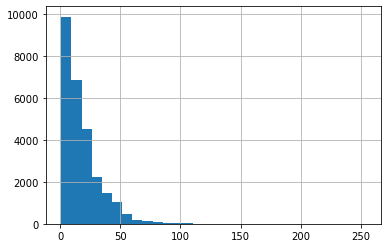

In [9]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in amharic_train.tweet]

pd.Series(seq_len).hist(bins = 30)


#It looks like the max length peters out after 50 although it goes up to 250 length

In [10]:
bert_model.summary()

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  177853440 
Total params: 177,853,440
Trainable params: 177,853,440
Non-trainable params: 0
_________________________________________________________________


In [9]:

max_length = 50 #use from chart above

num_examples = 10000
#num_examples = len(amharic_train.tweet)

x_train = tokenizer([x for x in amharic_train.tweet][:num_examples], 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')
y_train = tf.convert_to_tensor(amharic_train.label[:num_examples])




x_dev = tokenizer([x for x in amharic_dev.tweet][:num_examples], 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')
y_dev = tf.convert_to_tensor(amharic_dev.label[:num_examples])

In [23]:
#Let's look at class imbalance
print('ratio of positive examples: ', np.sum(y_train==1)/len(y_train))
#y_train

ratio of positive examples:  0.504962962962963


In [24]:
x_train

{'input_ids': <tf.Tensor: shape=(27000, 50), dtype=int32, numpy=
array([[101, 100, 100, ...,   0,   0,   0],
       [101, 100, 100, ...,   0,   0,   0],
       [101, 100, 100, ...,   0,   0,   0],
       ...,
       [101, 100, 100, ...,   0,   0,   0],
       [101, 100, 100, ...,   0,   0,   0],
       [101, 100, 100, ...,   0,   0,   0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(27000, 50), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(27000, 50), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

## Building the Classification Model

In [10]:
#From BERT_Fine_tuning Walkthrough Notebook/Session

def create_classification_model(hidden_size = 200, 
                                train_layers = -1, 
                                optimizer=tf.keras.optimizers.Adam()):
    """
    Build a simple classification model with BERT. Let's keep it simple and don't add dropout, layer norms, etc.
    """

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                  'token_type_ids': token_type_ids,
                  'attention_mask': attention_mask}


    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in bert_model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False


    bert_out = bert_model(bert_inputs) #same as x_tiny example above, always set ouput to model acting on input

    
    #getting the CLS token, could change to bert_out[1]
    classification_token = tf.keras.layers.Lambda(lambda x: x[:,0,:], name='get_first_vector')(bert_out[0]) 


    hidden = tf.keras.layers.Dense(hidden_size, name='hidden_layer',activation='relu')(classification_token)
    
    dropout = tf.keras.layers.Dropout(rate=0.1)(hidden)
    
    hidden2 = tf.keras.layers.Dense(hidden_size, name='hidden_layer2',activation='relu')(dropout)

    classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(hidden2)

    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], 
                                          outputs=[classification])
    
    classification_model.compile(optimizer=optimizer,
                            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                            metrics='accuracy')


    return classification_model

## Experimentation
Creating models and changing parameters

#### Model 1: Following Model 1 from BERT_Fine_tuning walkthrough notebook with another dense layer and no dropout

In [26]:
classification_model = create_classification_model()  

In [27]:
#This took a long time, may want to increase batch_size for next run?
classification_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask],
                         y_train,
                         validation_data=([x_dev.input_ids, x_dev.token_type_ids, x_dev.attention_mask],
                         y_dev),
                        epochs=5,
                        batch_size=10)

Epoch 1/5
2700/2700 [==============================] - 397s 144ms/step - loss: 0.6991 - accuracy: 0.4981 - val_loss: 0.6924 - val_accuracy: 0.5207
Epoch 2/5
2700/2700 [==============================] - 386s 143ms/step - loss: 0.6936 - accuracy: 0.5034 - val_loss: 0.6923 - val_accuracy: 0.5207
Epoch 3/5
2700/2700 [==============================] - 385s 143ms/step - loss: 0.6932 - accuracy: 0.5073 - val_loss: 0.6926 - val_accuracy: 0.5207
Epoch 4/5
2700/2700 [==============================] - 385s 143ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6933 - val_accuracy: 0.4793
Epoch 5/5
2700/2700 [==============================] - 385s 143ms/step - loss: 0.6931 - accuracy: 0.5071 - val_loss: 0.6931 - val_accuracy: 0.5207


In [28]:
predictions = classification_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], ) #output represents likelihood example was in the positive class
#these are all about the same and not very confident either way about whether example is in the class or not
predictions

array([[0.50076824],
       [0.50076824],
       [0.50076824],
       ...,
       [0.50076824],
       [0.50076824],
       [0.50076824]], dtype=float32)

In [29]:
np.unique(predictions) #All the same predictions :(

array([0.50076824], dtype=float32)

In [30]:
# Generate generalization metrics
score = classification_model.evaluate([x_dev.input_ids, x_dev.token_type_ids, x_dev.attention_mask],
                         y_dev, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.6930848956108093 / Test accuracy: 0.5206666588783264


In [22]:
#Creating some new columns & printing out a csv with the predicted labels
amharic_train["predicted_label"] = np.nan
amharic_train["predicted_stat"] = predictions
amharic_train.loc[(amharic_train["predicted_stat"] >= 0.5), "predicted_label"] = 1
amharic_train.loc[(amharic_train["predicted_stat"] < 0.5), "predicted_label"] = 0
amharic_train.to_csv("Amharic_train_predictions")

<ipython-input-22-7565c2f4f57a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amharic_train["predicted_label"] = np.nan
<ipython-input-22-7565c2f4f57a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amharic_train["predicted_stat"] = predictions
/home/joanieweaver/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

#### Model 2: Following Model 2 from BERT Walkthrough notebook
Updating learning rate

In [13]:
#do same thing as above but change learning rate in Adam below, need to get fresh bert model
try:
    del classification_model
except:
    pass

try:
    del bert_model
except:
    pass

tf.keras.backend.clear_session()

#NEED to import and load both of these
#using the pretrained model called bert-base-cased
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

classification_model = create_classification_model(optimizer=tf.keras.optimizers.Adam(0.00005))

classification_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask],
                         y_train,
                         validation_data=([x_dev.input_ids, x_dev.token_type_ids, x_dev.attention_mask],
                         y_dev),
                        epochs=5,
                        batch_size=10)

classification_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])


#This looks a little worse, not sure why it's now predicting 54% consistently

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/5
2700/2700 [==============================] - 413s 150ms/step - loss: 0.6996 - accuracy: 0.4995 - val_loss: 0.6937 - val_accuracy: 0.5040
Epoch 2/5
2700/2700 [==============================] - 404s 150ms/step - loss: 0.6945 - accuracy: 0.4970 - val_loss: 0.6933 - val_accuracy: 0.5040
Epoch 3/5
2700/2700 [==============================] - 404s 150ms/step - loss: 0.6941 - accuracy: 0.4976 - val_loss: 0.6933 - val_accuracy: 0.5040
Epoch 4/5
2700/2700 [==============================] - 403s 149ms/step - loss: 0.6937 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 5/5
2700/2700 [==============================] - 403s 149ms/step - loss: 0.6933 - accuracy: 0.5101 - val_loss: 0.6932 - val_accuracy: 0.4960


array([[0.49768618],
       [0.49768618],
       [0.49768618],
       ...,
       [0.49768618],
       [0.49768618],
       [0.49768618]], dtype=float32)

In [14]:
# Generate generalization metrics
score = classification_model.evaluate([x_dev.input_ids, x_dev.token_type_ids, x_dev.attention_mask],
                         y_dev, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.6931948065757751 / Test accuracy: 0.4959999918937683


In [15]:
classification_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attention_mask_layer (InputLaye [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_ids_layer (InputLayer)    [(None, 50)]         0                                            
__________________________________________________________________________________________________
token_type_ids_layer (InputLaye [(None, 50)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 177853440   attention_mask_layer[0][0]       
                                                                 input_ids_layer[0][0]        

## Model 3: Adding dropout in between two dense layers

In [11]:
classification_model = create_classification_model()  

In [12]:
#This took a long time, may want to increase batch_size for next run?
classification_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask],
                         y_train,
                         validation_data=([x_dev.input_ids, x_dev.token_type_ids, x_dev.attention_mask],
                         y_dev),
                        epochs=5,
                        batch_size=10)

Epoch 1/5
1000/1000 [==============================] - 165s 156ms/step - loss: 0.7145 - accuracy: 0.5055 - val_loss: 0.6931 - val_accuracy: 0.5083
Epoch 2/5
1000/1000 [==============================] - 155s 155ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6930 - val_accuracy: 0.5083
Epoch 3/5
1000/1000 [==============================] - 155s 155ms/step - loss: 0.6928 - accuracy: 0.5167 - val_loss: 0.7164 - val_accuracy: 0.4917
Epoch 4/5
1000/1000 [==============================] - 155s 155ms/step - loss: 0.6989 - accuracy: 0.5122 - val_loss: 0.6930 - val_accuracy: 0.5083
Epoch 5/5
1000/1000 [==============================] - 155s 155ms/step - loss: 0.6933 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.5083


In [13]:
predictions = classification_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], ) #output represents likelihood example was in the positive class
#these are all about the same and not very confident either way about whether example is in the class or not
predictions

array([[0.51710284],
       [0.51710284],
       [0.51710284],
       ...,
       [0.51710284],
       [0.51710284],
       [0.51710284]], dtype=float32)

In [14]:
np.unique(predictions)

array([0.51710284], dtype=float32)

## Model 4: Translate to English and then Run

In [5]:
from googletrans import Translator

In [22]:
translator = Translator()
    

In [26]:
translator.translate('veritas lux mea', src='la').text

'veritas lux mea'

In [24]:
translation = translator.translate('hola',src='sp',dest='en')
translation.text

ValueError: invalid source language

In [13]:
english = []
num_examples = 10

for i in range(num_examples):
    print(i)
    translation = translator.translate(str(amharic_data.tweet[i]), sdest='en')
    english.append(translation.text)
    print(translation.)
    
    
amharic = amharic_data[:num_examples].copy()
amharic['english'] = english


0
አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለማገዝ ብሞክር  እርስዎ የመፅሀፍ ቅዱሱ የዳዊት  ኦሮዮንን መንገድ በመምረጥዎ በይፋ ለመፃፍ ተገድጃለሁ  አሁንም መረጃው እንዴት እሱ ጋር ደረሰ የሚለውን ውትወታ ትተው በማንኛውም መንገድ ቀጥተኛ ምላሽ ይስጡኝ   ከመስከረም   ወዲያ አሁን ያለሁ መንግስት ህጋዊ የስራ ዘመኑ ስለሚያበቃ የባለአደራ መንግስት እንዲቋቋም ሆኖም አሁን ያለው የአብይ መንግስት አስፈፃሚ አካል የመንግስትን የእለ ተእለት ተግባራትን እየከወነ ምርጫ እስኪደረግ ለ አመት እ
1
እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደረግ በመግለጫው ጠይቀዋል
2
የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የእውቀት ጎዳና አይኑ ያላየው ጆሮው ያልሰማው ልቡ ያላሰበው እውቀትና ብልሀት የለም
3
ከአማራ ህዝብ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመልክ በመልኩ ሲቀዳበት የኖረ ከኢትዮጵያ አልፎ ለአለም ሲታደል የኖረውና የሚኖረው እውቀት የተገኘበት ታላቅ ነገድ ነው
4
ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ ህዝብ ላይ ብቻ ነውሌላው የትህነግን ባንዲራ ለብሶየኦነግን ባንዲራ እያውለበለበ የኢትዮጵያን ሰንደቅአላማ በእግሩ ረግጦታልጨርቅ ነው ብለው አቃጥለውታልቀዳደው ጥለውታል
5
በአማራ ህዝብ ግን ደም የገበረባትአጥንት የከሰከሰባት ሰንደቅአላማ ናትና በሀዘኑበደስታውበአደባባይና በሰልፍ በክብር ያውለበልባታልይፎክርባታልያዜምባታል
6
የኢትዮጵያ ብሄራዊ ቡድን በመቀሌ እስታዲየም ሲጫወት የገቡት ደጋፊዎች በፍሬ የሚቆጠሩ ናቸው ሊያውም ይዘውት የገቡት የትህነግን የደደቢት አርማ ይዘው እንደሆነ የቅርብ ጊዜ ትውስታ ነው
7
ዛሬም የአርሰናሉን ፔፔን

In [12]:
amharic

,id,tweet,subtask_a,label,english
0,0,አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለ...,NOT,0.0,አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለ...
1,1,እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደረ...,NOT,0.0,እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደረ...
2,2,የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የ...,NOT,0.0,የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የ...
3,3,ከአማራ ህዝብ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመል...,NOT,0.0,ከአማራ ህዝብ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመል...
4,4,ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ...,OFF,1.0,ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ...
5,5,በአማራ ህዝብ ግን ደም የገበረባትአጥንት የከሰከሰባት ሰንደቅአላማ ናትና ...,NOT,0.0,በአማራ ህዝብ ግን ደም የገበረባትአጥንት የከሰከሰባት ሰንደቅአላማ ናትና ...
6,6,የኢትዮጵያ ብሄራዊ ቡድን በመቀሌ እስታዲየም ሲጫወት የገቡት ደጋፊዎች በፍ...,NOT,0.0,የኢትዮጵያ ብሄራዊ ቡድን በመቀሌ እስታዲየም ሲጫወት የገቡት ደጋፊዎች በፍ...
7,7,ዛሬም የአርሰናሉን ፔፔን የቶተንሀሙን ሰርጅ አውሪር ይዞ የገባው ኮትዲሾዋ...,NOT,0.0,ዛሬም የአርሰናሉን ፔፔን የቶተንሀሙን ሰርጅ አውሪር ይዞ የገባው ኮትዲሾዋ...
8,8,ስማ ለምን ኡነተኛ ታሪክ አታወራም ለምንስ የሰው ታሪክ ትሰርቃላቹ የኢትዮ...,OFF,1.0,ስማ ለምን ኡነተኛ ታሪክ አታወራም ለምንስ የሰው ታሪክ ትሰርቃላቹ የኢትዮ...
9,9,ሀገራዊ ወግ ያለው ለሁሉ የሆነ አስገድዶ ሳይሆን በፍቅርና በልዩ ሰዋዊ አ...,NOT,0.0,ሀገራዊ ወግ ያለው ለሁሉ የሆነ አስገድዶ ሳይሆን በፍቅርና በልዩ ሰዋዊ አ...


In [ ]:
pd.to_csv(amharic_data, "data/english_trans_amharic.csv")

In [ ]:
#splitting into test/train again
amharic_train, amharic_test = train_test_split(amharic_data, train_size=0.8)
amharic_test, amharic_dev = train_test_split(amharic_test, train_size=0.5)

In [ ]:
#tokenizing

max_length = 50 #use from chart above

num_examples = 10000
#num_examples = len(amharic_train.tweet)

x_train = tokenizer([x for x in amharic_train.tweet][:num_examples], 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')
y_train = tf.convert_to_tensor(amharic_train.label[:num_examples])




x_dev = tokenizer([x for x in amharic_dev.tweet][:num_examples], 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')
y_dev = tf.convert_to_tensor(amharic_dev.label[:num_examples])

In [ ]:
classification_model = create_classification_model()  
#This took a long time, may want to increase batch_size for next run?
classification_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask],
                         y_train,
                         validation_data=([x_dev.input_ids, x_dev.token_type_ids, x_dev.attention_mask],
                         y_dev),
                        epochs=5,
                        batch_size=10)

In [ ]:
predictions = classification_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], ) #output represents likelihood example was in the positive class
#these are all about the same and not very confident either way about whether example is in the class or not
predictions